<a href="https://colab.research.google.com/github/SafaaFathii/CreditCard-DataScience-Project/blob/main/notebooks/ML_II_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import QuantileTransformer

from sklearn.utils import extmath
import seaborn as sns
sns.set()

In [565]:
DATA_PATH = "https://raw.githubusercontent.com/SafaaFathii/CreditCard-DataScience-Project/main/src/data/CC%20GENERAL.csv"

In [566]:
df = pd.read_csv(DATA_PATH)
df.drop(['CUST_ID'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12




---



---



# Data Exploration



In [567]:
df.shape

(8950, 17)

In [568]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [570]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a446df490>,
      dtype=object)

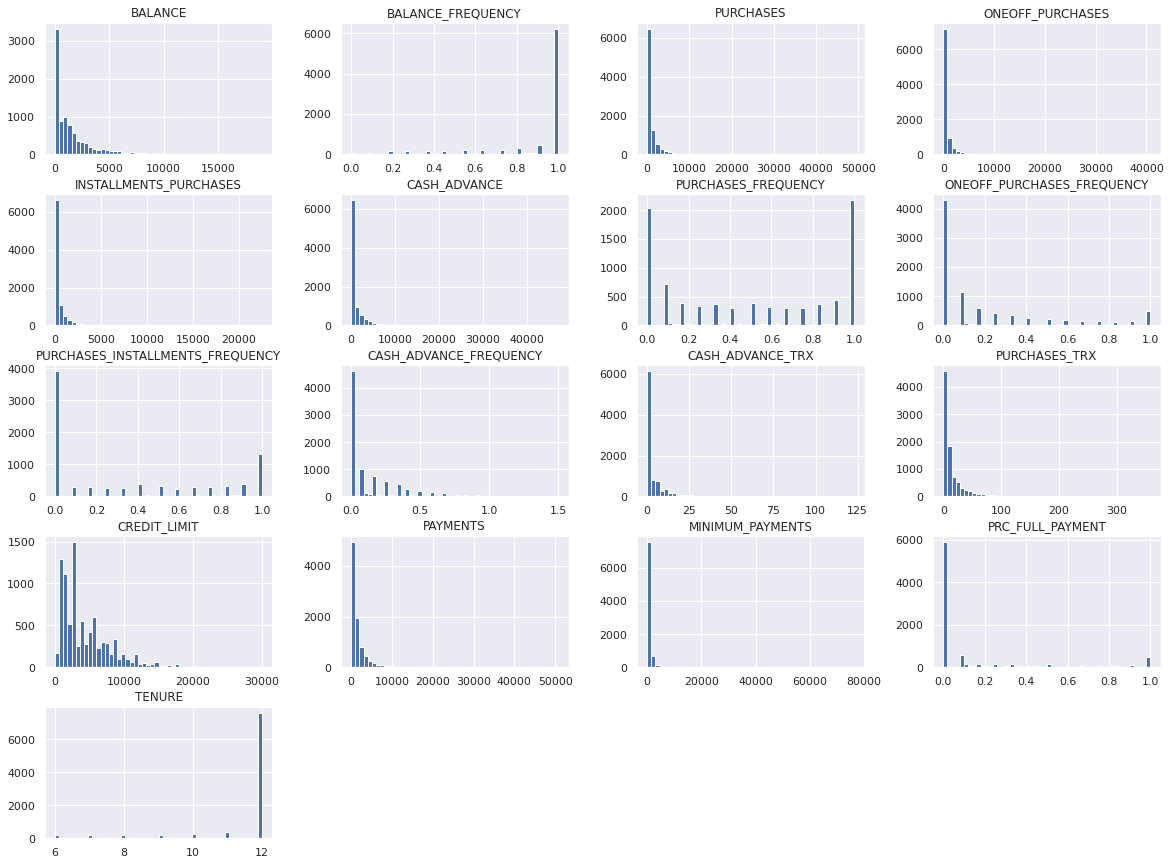

In [571]:
df.hist(bins = 50,figsize = (20,15))

In [572]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [573]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64



---



---



# Data Preprocessing

### *Handling Missing Values*

In [574]:
df_copy = df
df_copy["CREDIT_LIMIT"].fillna(df_copy["CREDIT_LIMIT"].median(),inplace=True)
df_copy["MINIMUM_PAYMENTS"].fillna(df_copy["MINIMUM_PAYMENTS"].median(),inplace=True)



### *Data Scaling*

In [575]:
sc = StandardScaler()
df_scal = sc.fit_transform(df_copy)

In [576]:
df_scal

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

### *Log Transformation*

In [577]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
for col in cols:
     df_copy[col] = np.log(1 + df_copy[col])

In [578]:
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,95.40,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.00,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12
2,7.822504,1.000000,773.17,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,1499.00,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,12
4,6.707735,1.000000,16.00,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,1.000000,291.12,0.000000,5.677165,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,6
8946,3.004851,1.000000,300.00,0.000000,5.707110,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.747301,0.000000,6
8947,3.194529,0.833333,144.40,0.000000,4.979489,0.000000,0.833333,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,6
8948,2.671218,0.833333,0.00,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.166667,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,6


### *Quantile Transformation*

In [579]:
# #solution 
# trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
# df_trans = trans.fit_transform(df_copy)
# #test 
# df_copy = pd.DataFrame(df_trans,columns=df_copy.columns)
# # histograms of the variables
# %matplotlib inline
# df_copy.hist(bins=50, figsize=(16,16))
# plt.show()

### *Is PCA better than Kernel PCA?*


Kernel PCA: to help with the classification of data whose decision boundaries are described by non-linear function

### PCA

In [580]:
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_copy)
# #explained_variance = pca.explained_variance_ratio_


In [581]:
# exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
# px.area(
#     x=range(1, exp_var_cumul.shape[0] + 1),
#     y=exp_var_cumul,
#     labels={"x": "# Components", "y": "Explained Variance"}
# )

### *Kernel PCA*

In [582]:
kernelPCA = KernelPCA(n_components=3, kernel='rbf', gamma=0.01)
df_ker_PCA = kernelPCA.fit_transform(df_copy)

### T-*SNE*

In [583]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=2.5, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=2, 
                       n_iter=10**4, 
                       random_state=0).fit_transform(df_copy.T)

tsne_projection = pd.DataFrame(tsne_projection, index=df_copy.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [584]:
tsne_projection.shape

(17, 2)

In [585]:
# fig = px.scatter(x=tsne_projection[0], y=tsne_projection[1], text=tsne_projection.index)
# fig.update_traces(textposition='top center')
# fig.update_layout(height=1000, width=1200, title_text='TSNE')
# fig.show()

# All Unsupervised Algorithms

## K-Means

In [586]:
class K_means():
    def _init_(self,X,K):       
        self.X=X
        self.K=K
    
    
    
    def kMeansInitCentroids(self,X, K):        
         #centroids =np.zeros([K,X.shape[1]])
        choices = np.random.choice(X.shape[0],size = K,replace=False)
        centroids = X[choices,:]
   
        return centroids
    
    
    
    def computeCentroids(self,X, idx, K):  
        centroids =np.zeros([K,X.shape[1]])  
        for i in range(K):
            count = 0
            sumi = np.zeros(X.shape[1])
            for j in range(len(idx)):
                if idx[j]==i:
                    sumi+=X[j,:]
                    count+=1
            centroids[i,:]=sumi/count
        return centroids      
         



    def findClosestCentroids(self,X, centroids):     
        #idx = np.array([X.shape[0],1])
        idx = np.zeros(X.shape[0],dtype = int);
        #idx = []
        distance = 0
        for i in range(len(X)):
            minDistance = 0
            for j in range(len(centroids)):
                distance = sum((abs(X[i,:]-centroids[j,:]))**2)
                #print(distance)
                if j==0:
                    minDistance =distance
                    #print(minDistance)
                    idx[i] = j
            
                else:
                    if distance <minDistance:
                        minDistance = distance
                        idx[i] = j     
        return idx


In [587]:
# kmean = K_means()
# centroids = kmean.kMeansInitCentroids(df_copy.values,3)
# #print(centroids)
# for i in range(100):
#     idx = kmean.findClosestCentroids(df_copy.values,centroids)
#     centroids = kmean.computeCentroids(df_copy.values,idx,3)
# idxDF = pd.DataFrame(idx)
# idxDF.value_counts()


In [588]:
kmeans = KMeans(n_clusters=3, random_state=0,max_iter=100).fit(df_pca)
y_kmeans =  kmeans.fit_predict(df_pca)
kmeans.labels_
kmeanDF = pd.DataFrame(kmeans.labels_)
kmeanDF.value_counts()

1    8195
0     731
2      24
dtype: int64

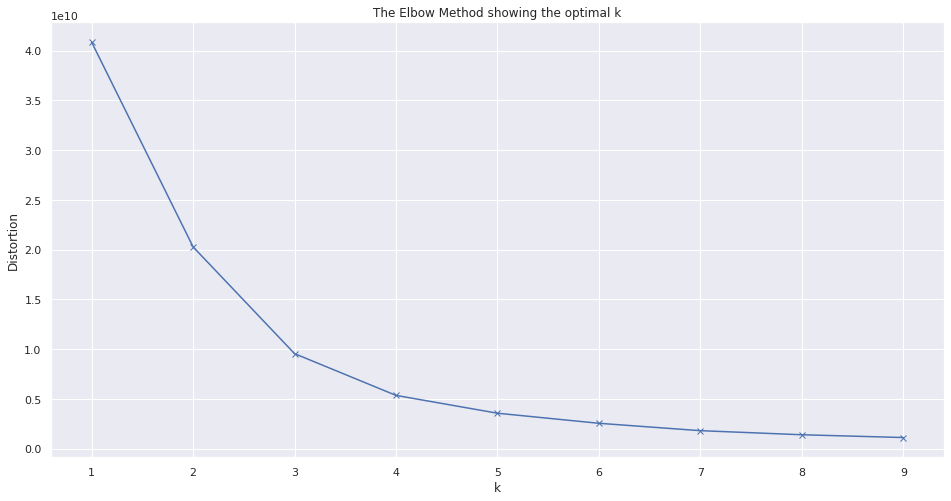

In [589]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [590]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_pca)
    kmeanModel.fit(df_pca)
 
    distortions.append(sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_pca.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_pca.shape[0]
    mapping2[k] = kmeanModel.inertia_

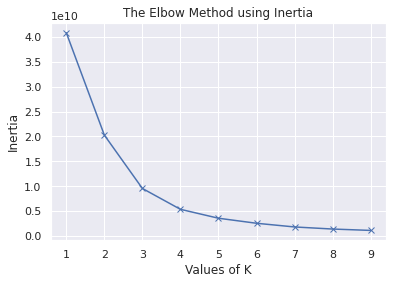

In [591]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [592]:
kmeans = KMeans(n_clusters=3,random_state=23)
kmeans.fit(df_pca)
#y_kmeans =  kmeans.fit_predict(df_copy)

KMeans(n_clusters=3, random_state=23)

In [593]:
kmeansKernel = KMeans(n_clusters=3,random_state=23)
kmeansKernel.fit(df_ker_PCA)

KMeans(n_clusters=3, random_state=23)

In [594]:
kmeansTSNE = KMeans(n_clusters=3,random_state=23)
kmeansTSNE.fit(tsne_projection)

KMeans(n_clusters=3, random_state=23)

In [595]:
from sklearn.metrics import silhouette_score
print('Silhoutte score of our model using PCA is ' + str(silhouette_score(df_pca, kmeans.labels_)))
print('Silhoutte score of our model using Kernel PCA is ' + str(silhouette_score(df_ker_PCA, kmeansKernel.labels_)))
print('Silhoutte score of our model using T-SNE is ' + str(silhouette_score(tsne_projection, kmeansTSNE.labels_)))

Silhoutte score of our model using PCA is 0.7983795956688682
Silhoutte score of our model using Kernel PCA is 0.8239888904681106
Silhoutte score of our model using T-SNE is 0.57672656


In [596]:
kmeans.labels_
kmeanDF = pd.DataFrame(kmeans.labels_)
kmeanDF.value_counts()

1    8195
0     731
2      24
dtype: int64

In [597]:
np.unique(y_kmeans)

array([0, 1, 2], dtype=int32)

In [598]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Counters Dendograms")
# dend = shc.dendrogram(shc.linkage(y=df_pca , method="complete",metric="euclidean"),orientation='right') #fill y with your dataframe
#                                                                                       #and method with linkage criteria
#                                                                                       #and metric with distance function

## Agglomerative Clustering

In [599]:
hier_cluster_PCA = AgglomerativeClustering(n_clusters=3,linkage='complete')
hier_clustering_PCA = hier_cluster_PCA.fit_predict(df_pca)

In [600]:
hier_cluster_KernelPCA = AgglomerativeClustering(n_clusters=3,linkage='complete')
hier_clustering_KernelPCA = hier_cluster_KernelPCA.fit_predict(df_ker_PCA)


In [601]:
hier_cluster_TSNE = AgglomerativeClustering(n_clusters=3,linkage='complete')
hier_clustering_TSNE = hier_cluster_TSNE.fit_predict(tsne_projection)

In [602]:
print('Silhoutte score of our model using PCA is ' + str(silhouette_score(df_pca, hier_clustering_PCA)))
print('Silhoutte score of our model using KenelPCA is ' + str(silhouette_score(df_ker_PCA, hier_clustering_KernelPCA)))
print('Silhoutte score of our model using TSNE is ' + str(silhouette_score(tsne_projection, hier_clustering_TSNE)))


Silhoutte score of our model using PCA is 0.938015912929925
Silhoutte score of our model using KenelPCA is 0.8223674165129162
Silhoutte score of our model using TSNE is 0.57672656


# DBSCAN

In [603]:
clustering_PCA = DBSCAN(eps=8, min_samples=4).fit(df_pca)

In [604]:
print('Silhoutte score of our model is ' + str(silhouette_score(df_pca, clustering_PCA.labels_)))

Silhoutte score of our model is 0.4783163421452241


# EM

In [605]:
from sklearn import mixture
gmmPCA = mixture.GaussianMixture(n_components=2,covariance_type="full",max_iter = 100,init_params="random")
gmmPCA.fit(df_pca)
yClustPCA = gmmPCA.predict(df_pca)


In [606]:
gmmKernPCA = mixture.GaussianMixture(n_components=2,covariance_type="full",max_iter = 100,init_params="random")
gmmKernPCA.fit(df_ker_PCA)
yClustKernPCA = gmmKernPCA.predict(df_ker_PCA)

In [607]:
gmmTSNE = mixture.GaussianMixture(n_components=2,covariance_type="full",max_iter = 100,init_params="random")
gmmTSNE.fit(tsne_projection)
yClustTSNE = gmmTSNE.predict(tsne_projection)

In [608]:
print('Silhoutte score of our model using PCA is ' + str(silhouette_score(df_pca,yClustPCA)))
print('Silhoutte score of our model using Kernel PCA is ' + str(silhouette_score(df_ker_PCA,yClustKernPCA)))
print('Silhoutte score of our model using TSNE is ' + str(silhouette_score(tsne_projection,yClustTSNE)))

Silhoutte score of our model using PCA is 0.5125503593091862
Silhoutte score of our model using Kernel PCA is 0.7308047659951039
Silhoutte score of our model using TSNE is 0.93669724


# Isolation Random Forest

In [609]:
from sklearn.ensemble import IsolationForest
model =  IsolationForest()
model.fit(df_pca)
df['anomaly25'] = pd.Series(model.predict(df_pca))
df['anomaly25'] = df['anomaly25'].map( {1: 0, -1: 1} )
print(df['anomaly25'].value_counts())

0    7123
1    1827
Name: anomaly25, dtype: int64


In [610]:
from sklearn.ensemble import IsolationForest
model =  IsolationForest()
model.fit(df_ker_PCA)
df['anomaly26'] = pd.Series(model.predict(df_ker_PCA))
df['anomaly26'] = df['anomaly26'].map( {1: 0, -1: 1} )
print(df['anomaly26'].value_counts())

0    7034
1    1916
Name: anomaly26, dtype: int64


In [611]:
print('Silhoutte score of our model using PCA is ' + str(silhouette_score(df_pca,df['anomaly25'])))
print('Silhoutte score of our model using kernel PCA is ' + str(silhouette_score(df_ker_PCA,df['anomaly26'])))


Silhoutte score of our model using PCA is 0.5072565002179541
Silhoutte score of our model using kernel PCA is 0.5918908557388693
